In [15]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests
import requests

# Import the API key
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(67.19270422212992, -124.94461253838261),
 (-15.734265742454895, -132.64172574436665),
 (5.633282352292326, -128.07205133201109),
 (76.04922735899422, 90.07240607337405),
 (0.6033984750549877, -39.10986514613123),
 (-56.79332422921366, -29.293841370798162),
 (-74.43096993756636, 0.4033786946916962),
 (30.172325365240766, 115.69079535409776),
 (51.86227520492571, -11.23302859035536),
 (54.99984997882498, 95.13768130631661),
 (-79.203836344259, 14.984223295170722),
 (45.203993605885046, -179.1039661005207),
 (-41.23826117495046, 10.01874529031761),
 (-74.53057328698472, -81.72787850657001),
 (62.93813294502172, 80.91014099681712),
 (-38.300770869602566, 99.79417548751246),
 (-13.516175523242552, 51.25332132301739),
 (78.76457730837473, -103.7130256757553),
 (17.803380238263898, 87.75701426675926),
 (16.872832443541355, -44.2111380510226),
 (27.510728218236082, -123.80016863893782),
 (-28.393752251297812, 115.17974793691866),
 (-74.62989047066195, 94.22181246288108),
 (-85.72434723196798

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | norman wells
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | itarema
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | caohe
Processing Record 9 of Set 1 | dingle
Processing Record 10 of Set 1 | aginskoye
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | provideniya
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | krasnoselkup
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | sambava
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | paradwip
City not found. Skipping...
Processing Record 20 of Set 1 | sinnamary
Processing Record 21 of Set 1 | lompoc
Processing Record 22 of Set 1 | geraldton
Processing Recor

Processing Record 39 of Set 4 | toftir
City not found. Skipping...
Processing Record 40 of Set 4 | sorong
Processing Record 41 of Set 4 | kapaa
Processing Record 42 of Set 4 | hithadhoo
Processing Record 43 of Set 4 | ponta do sol
Processing Record 44 of Set 4 | makung
City not found. Skipping...
Processing Record 45 of Set 4 | la ronge
Processing Record 46 of Set 4 | ranong
Processing Record 47 of Set 4 | mendi
Processing Record 48 of Set 4 | samusu
City not found. Skipping...
Processing Record 49 of Set 4 | portree
Processing Record 50 of Set 4 | mega
Processing Record 1 of Set 5 | tome
Processing Record 2 of Set 5 | chingirlau
Processing Record 3 of Set 5 | marsaxlokk
Processing Record 4 of Set 5 | betma
Processing Record 5 of Set 5 | palmares
Processing Record 6 of Set 5 | balkhash
Processing Record 7 of Set 5 | new norfolk
Processing Record 8 of Set 5 | zyryanka
Processing Record 9 of Set 5 | vysokogornyy
Processing Record 10 of Set 5 | senador pompeu
Processing Record 11 of Set 5

Processing Record 31 of Set 8 | ushtobe
Processing Record 32 of Set 8 | alice springs
Processing Record 33 of Set 8 | oxapampa
Processing Record 34 of Set 8 | xichang
Processing Record 35 of Set 8 | khonuu
City not found. Skipping...
Processing Record 36 of Set 8 | flinders
Processing Record 37 of Set 8 | vestmannaeyjar
Processing Record 38 of Set 8 | ginda
Processing Record 39 of Set 8 | shirakamut
Processing Record 40 of Set 8 | grand forks
Processing Record 41 of Set 8 | gilbues
Processing Record 42 of Set 8 | kysyl-syr
Processing Record 43 of Set 8 | dali
Processing Record 44 of Set 8 | mangrol
Processing Record 45 of Set 8 | hailar
Processing Record 46 of Set 8 | constitucion
Processing Record 47 of Set 8 | saldanha
Processing Record 48 of Set 8 | kerman
Processing Record 49 of Set 8 | kargasok
Processing Record 50 of Set 8 | aklavik
Processing Record 1 of Set 9 | borisoglebsk
Processing Record 2 of Set 9 | ekibastuz
Processing Record 3 of Set 9 | fortuna
Processing Record 4 of Se

Processing Record 17 of Set 12 | straumen
Processing Record 18 of Set 12 | talara
Processing Record 19 of Set 12 | odienne
Processing Record 20 of Set 12 | shu
Processing Record 21 of Set 12 | feicheng
Processing Record 22 of Set 12 | mabaruma
Processing Record 23 of Set 12 | yanam
Processing Record 24 of Set 12 | zhezkazgan
Processing Record 25 of Set 12 | luderitz
Processing Record 26 of Set 12 | salym
Processing Record 27 of Set 12 | omboue
Processing Record 28 of Set 12 | caapucu
Processing Record 29 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 30 of Set 12 | yerbogachen
Processing Record 31 of Set 12 | uvalde
Processing Record 32 of Set 12 | vadso
Processing Record 33 of Set 12 | kakching
Processing Record 34 of Set 12 | heerenveen
Processing Record 35 of Set 12 | prince rupert
Processing Record 36 of Set 12 | cahors
Processing Record 37 of Set 12 | sumbe
Processing Record 38 of Set 12 | araxa
Processing Record 39 of Set 12 | fuente de oro
Processing Record 40

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Norman Wells,65.2820,-126.8329,14.04,85,90,14.97,CA,2021-11-07 20:42:18
1,Rikitea,-23.1203,-134.9692,75.67,80,100,15.93,PF,2021-11-07 20:43:40
2,Atuona,-9.8000,-139.0333,78.17,77,4,15.86,PF,2021-11-07 20:43:33
3,Talnakh,69.4865,88.3972,24.17,97,100,5.66,RU,2021-11-07 20:43:41
4,Itarema,-2.9248,-39.9167,80.60,76,81,14.97,BR,2021-11-07 20:43:42
5,Chuy,-33.6971,-53.4616,61.83,68,15,7.87,UY,2021-11-07 20:43:43
6,Hermanus,-34.4187,19.2345,59.90,64,100,6.78,ZA,2021-11-07 20:43:44
7,Caohe,30.2297,115.4335,37.90,60,55,6.98,CN,2021-11-07 20:43:44
8,Dingle,10.9995,122.6711,77.18,92,57,7.31,PH,2021-11-07 20:43:45
9,Aginskoye,51.1000,114.5300,16.23,90,16,6.15,RU,2021-11-07 20:43:46


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Norman Wells,CA,2021-11-07 20:42:18,65.2820,-126.8329,14.04,85,90,14.97
1,Rikitea,PF,2021-11-07 20:43:40,-23.1203,-134.9692,75.67,80,100,15.93
2,Atuona,PF,2021-11-07 20:43:33,-9.8000,-139.0333,78.17,77,4,15.86
3,Talnakh,RU,2021-11-07 20:43:41,69.4865,88.3972,24.17,97,100,5.66
4,Itarema,BR,2021-11-07 20:43:42,-2.9248,-39.9167,80.60,76,81,14.97
5,Chuy,UY,2021-11-07 20:43:43,-33.6971,-53.4616,61.83,68,15,7.87
6,Hermanus,ZA,2021-11-07 20:43:44,-34.4187,19.2345,59.90,64,100,6.78
7,Caohe,CN,2021-11-07 20:43:44,30.2297,115.4335,37.90,60,55,6.98
8,Dingle,PH,2021-11-07 20:43:45,10.9995,122.6711,77.18,92,57,7.31
9,Aginskoye,RU,2021-11-07 20:43:46,51.1000,114.5300,16.23,90,16,6.15


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


<function matplotlib.pyplot.show(close=None, block=None)>

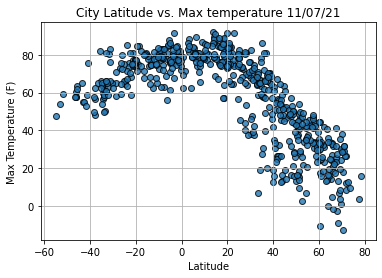

In [17]:
# Build the scatter plot for latitude vs max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# incorporate the other graphy properties.
plt.title(f"City Latitude vs. Max temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig1.png")

plt.show

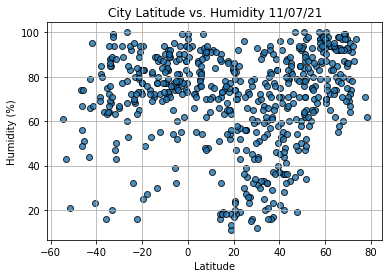

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

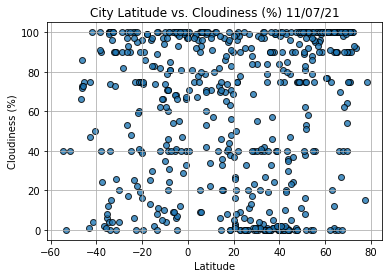

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

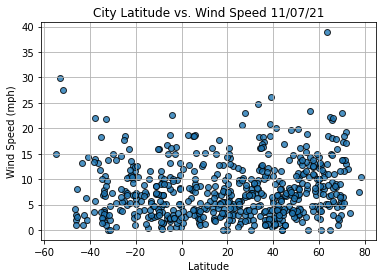

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
#   Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2021-11-07 20:39:41
Lat                         -54.8
Lng                         -68.3
Max Temp                    47.86
Humidity                       61
Cloudiness                     40
Wind Speed                  14.97
Name: 13, dtype: object

In [31]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
580    False
581     True
582     True
583     True
584     True
Name: Lat, Length: 585, dtype: bool

In [33]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Norman Wells,CA,2021-11-07 20:42:18,65.2820,-126.8329,14.04,85,90,14.97
3,Talnakh,RU,2021-11-07 20:43:41,69.4865,88.3972,24.17,97,100,5.66
7,Caohe,CN,2021-11-07 20:43:44,30.2297,115.4335,37.90,60,55,6.98
8,Dingle,PH,2021-11-07 20:43:45,10.9995,122.6711,77.18,92,57,7.31
9,Aginskoye,RU,2021-11-07 20:43:46,51.1000,114.5300,16.23,90,16,6.15


In [34]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [36]:
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Rikitea,PF,2021-11-07 20:43:40,-23.1203,-134.9692,75.67,80,100,15.93
2,Atuona,PF,2021-11-07 20:43:33,-9.8000,-139.0333,78.17,77,4,15.86
4,Itarema,BR,2021-11-07 20:43:42,-2.9248,-39.9167,80.60,76,81,14.97
5,Chuy,UY,2021-11-07 20:43:43,-33.6971,-53.4616,61.83,68,15,7.87
6,Hermanus,ZA,2021-11-07 20:43:44,-34.4187,19.2345,59.90,64,100,6.78


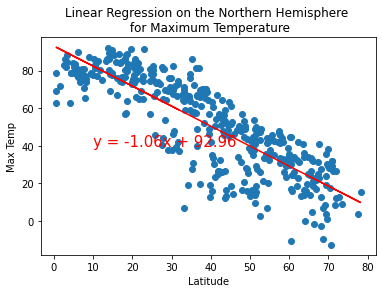

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

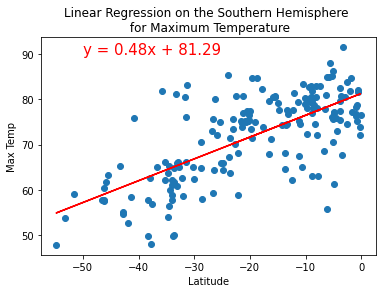

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))


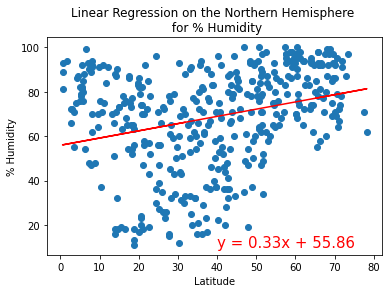

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

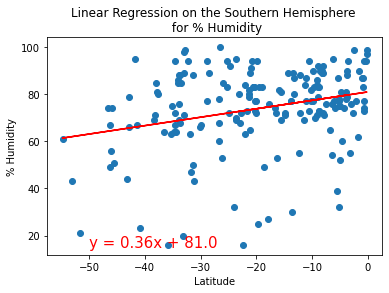

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

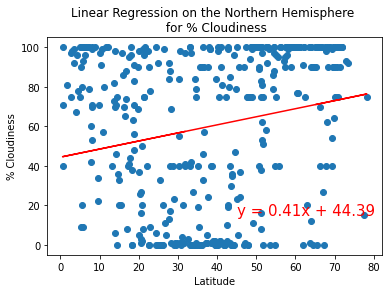

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,15))

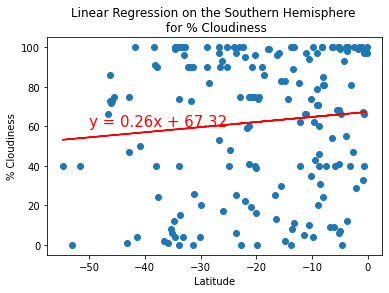

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

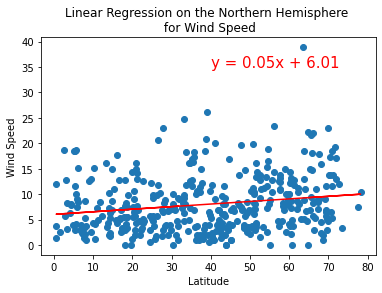

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

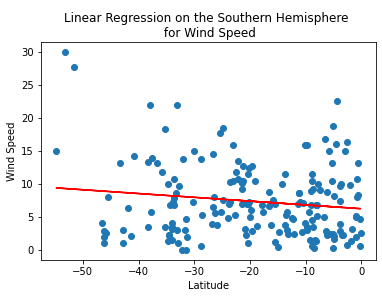

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))